<a href="https://colab.research.google.com/github/student-monika/Marvel_tasks/blob/main/Marvel_L2_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression from scratch

In [8]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.m = 0
        self.c = 0

    def fit(self, X, y):
        n = len(X)

        for _ in range(self.n_iters):
            y_pred = self.m * X + self.c
            dm = (-2 / n) * sum(X * (y - y_pred))
            dc = (-2 / n) * sum(y - y_pred)

            self.m -= self.lr * dm
            self.c -= self.lr * dc

    def predict(self, X):
        return self.m * X + self.c

Testing Linear Regression and Comparing with Scikit-Learn

Scratch MSE: 6.389666159322909
Scikit-Learn MSE: 6.389622975587788


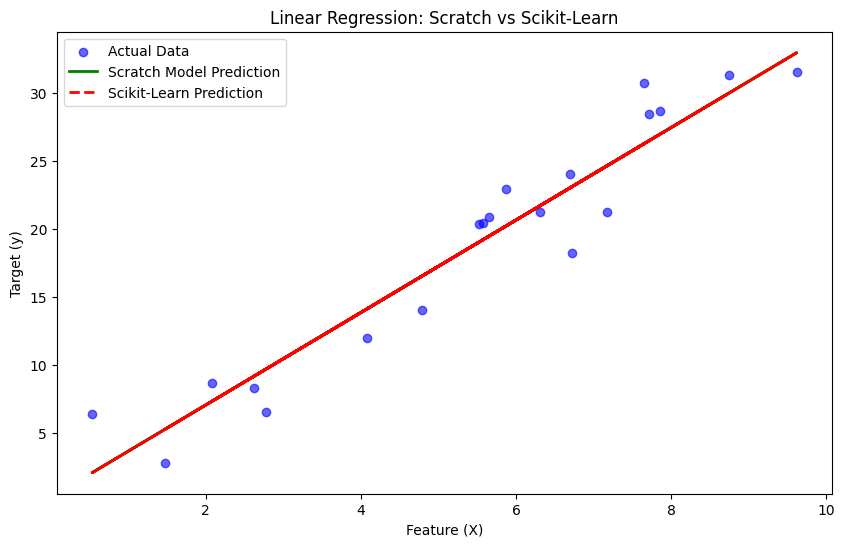

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate a simple dataset
X = np.random.rand(100) * 10
y = 3.5 * X + np.random.randn(100) * 2  # True relation is approximately y = 3.5 * X

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate our model
model_scratch = LinearRegressionScratch(learning_rate=0.01, n_iters=1000)
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)

# Compare with scikit-learn's model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train.reshape(-1, 1), y_train)
y_pred_sklearn = model_sklearn.predict(X_test.reshape(-1, 1))

print("Scratch MSE:", mean_squared_error(y_test, y_pred_scratch))
print("Scikit-Learn MSE:", mean_squared_error(y_test, y_pred_sklearn))

# Plotting results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data", alpha=0.6)
plt.plot(X_test, y_pred_scratch, color="green", label="Scratch Model Prediction", linewidth=2)
plt.plot(X_test, y_pred_sklearn, color="red", linestyle="--", label="Scikit-Learn Prediction", linewidth=2)
plt.title("Linear Regression: Scratch vs Scikit-Learn")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


Logistic regression implementation from scratch

In [4]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]


Testing Logistic Regression and Comparing with Scikit-Learn

Scratch Accuracy: 0.95
Scikit-Learn Accuracy: 0.95


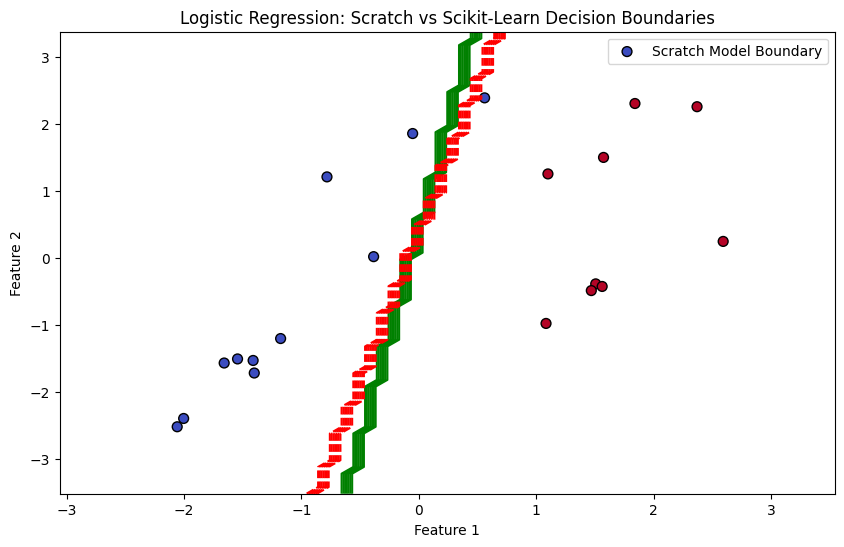

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate our scratch model
model_scratch = LogisticRegressionScratch(learning_rate=0.01, n_iters=1000)
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)

# Compare with scikit-learn's model
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

print("Scratch Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Scikit-Learn Accuracy:", accuracy_score(y_test, y_pred_sklearn))

# Plotting decision boundaries
def plot_decision_boundary(model, X, y, title, color='green', linestyle='-'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))  # Ensuring Z is an array
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=color, linestyles=linestyle)

plt.figure(figsize=(10, 6))

# Scatter plot of test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", s=50, edgecolor="k", label="Test Data")

# Plotting decision boundary for scratch model
plot_decision_boundary(model_scratch, X_test, y_test, "Scratch Model Boundary", color="green", linestyle='-')

# Plotting decision boundary for scikit-learn model
plot_decision_boundary(model_sklearn, X_test, y_test, "Scikit-Learn Model Boundary", color="red", linestyle='--')

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression: Scratch vs Scikit-Learn Decision Boundaries")
plt.legend(["Scratch Model Boundary", "Scikit-Learn Model Boundary", "Test Data"])
plt.show()
